<a href="https://colab.research.google.com/github/Innocent607/Cervical-Cancer-Screening-and-detection/blob/master/Cervical_Cancer_Screening_Technology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

edit from here...

this will be our start...


In [ ]:
from keras import layers
from keras import models
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers, regularizers

from keras.layers.core import Activation



Using TensorFlow backend.


In [ ]:

import os
import cv2
import random
import pickle
from os import path
import glob
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [ ]:
RESOLUTION = 250
BATCH_SIZE = 2

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.6)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_generator = train_datagen.flow_from_directory('/content/drive/My Drive/cancer_dataset/train/', target_size=(RESOLUTION, RESOLUTION), batch_size = BATCH_SIZE, class_mode='categorical', subset='training')

#val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

val_generator = val_datagen.flow_from_directory(
        '/content/drive/My Drive/cancer_dataset/train/', target_size=(RESOLUTION, RESOLUTION), batch_size = BATCH_SIZE, class_mode='categorical', subset='training')

test_datagen=ImageDataGenerator(rescale=1./255, validation_split=0.3)
test_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/cancer_dataset/test/', target_size=(RESOLUTION, RESOLUTION), batch_size = BATCH_SIZE, class_mode='categorical', subset='validation')

Found 7 images belonging to 2 classes.
Found 15 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(96, kernel_size = (11, 11), input_shape=(RESOLUTION, RESOLUTION, 3)))
convout1 = Activation('relu')
model.add(convout1)
convout2 = MaxPooling2D(pool_size=(3,3))
model.add(convout2)
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(5,5)))
convout3 = Activation('relu')
model.add(convout3)
convout4 = MaxPooling2D(pool_size=(3,3))
model.add(convout4)
model.add(BatchNormalization())

model.add(Conv2D(384, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(BatchNormalization())

model.add(Conv2D(384, kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(BatchNormalization())

model.add(Conv2D(384, kernel_size=(2,2)))
convout5 = Activation('relu')
model.add(convout5)
convout6 = MaxPooling2D(pool_size=(1,1))
model.add(convout6)
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(1,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 240, 240, 96)      34944     
_________________________________________________________________
activation_1 (Activation)    (None, 240, 240, 96)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 80, 80, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 80, 80, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 76, 76, 256)       614656    
_________________________________________________________________
activation_2 (Activation)    (None, 76, 76, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 256)      

In [ ]:
N_TRAIN = 12 #62
N_VAL = 6
history = model.fit_generator(
        train_generator,
        steps_per_epoch=(N_TRAIN // BATCH_SIZE),
        epochs=100,
        validation_data=val_generator,
        validation_steps=(N_VAL // BATCH_SIZE)
        )


Epoch 1/100
6/6 [==============================] - 10s 2s/step - loss: 0.7398 - acc: 0.7273 - val_loss: 0.6971 - val_acc: 0.3333
Epoch 2/100
6/6 [==============================] - 8s 1s/step - loss: 0.7422 - acc: 0.4000 - val_loss: 0.7152 - val_acc: 0.3333
Epoch 3/100
6/6 [==============================] - 8s 1s/step - loss: 0.6415 - acc: 0.9000 - val_loss: 0.6951 - val_acc: 0.6000
Epoch 4/100
6/6 [==============================] - 9s 2s/step - loss: 0.6672 - acc: 0.7273 - val_loss: 0.6940 - val_acc: 0.3333
Epoch 5/100
6/6 [==============================] - 8s 1s/step - loss: 0.5047 - acc: 0.8000 - val_loss: 0.6980 - val_acc: 0.5000
Epoch 6/100
6/6 [==============================] - 9s 1s/step - loss: 0.4986 - acc: 0.7273 - val_loss: 0.7762 - val_acc: 0.2000
Epoch 7/100
6/6 [==============================] - 8s 1s/step - loss: 0.6072 - acc: 0.6000 - val_loss: 0.6988 - val_acc: 0.5000
Epoch 8/100
6/6 [==============================] - 9s 1s/step - loss: 0.5522 - acc: 0.7273 - val_loss: 

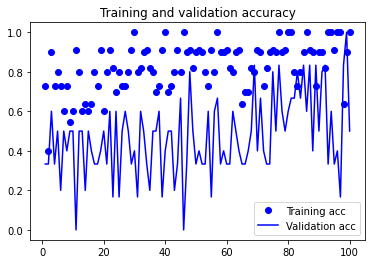

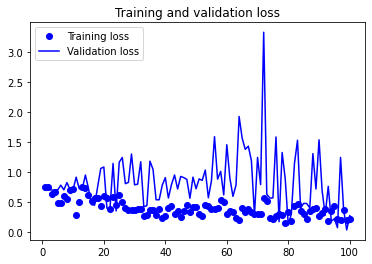

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(loc='best')

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='best')

In [ ]:
model.save('cancer_CNN_minimum.h5')
model.save_weights('cancer_CNN_Weights_minimum.h5')

In [ ]:
test_generator.filenames

[]

In [ ]:
model.pop()
model.pop()
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 240, 240, 96)      34944     
_________________________________________________________________
activation_1 (Activation)    (None, 240, 240, 96)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 80, 80, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 80, 80, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 76, 76, 256)       614656    
_________________________________________________________________
activation_2 (Activation)    (None, 76, 76, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 256)      

In [ ]:
#test_datagen = ImageDataGenerator(rescale=1./255)
#test_generator = train_datagen.flow_from_directory('/home/smartlab/Desktop/TRAIN', target_size=(RESOLUTION, RESOLUTION), batch_size=BATCH_SIZE, class_mode='categorical')

In [ ]:

Y_pred = model.predict_generator(test_generator, steps = 5)

#############################################################################

np.save('features_minimum.npy', Y_pred)

############################################################################

output_file = []
for name, arr_ in zip(test_generator.filenames, Y_pred):
    output_file.append((name, arr_))

###########################################################################

with open('output_features.txt', 'w') as f:
    for i in output_file:
        f.write('{}, {}\n'.format(i[0], i[1]))
        